# Introduction

This Data is being sourced from covid19india.org. As the second wave of the pandemic surges in India, There have been more 2k reported fatal cases for the last few days. I have done Statistical Analysis on this Data by dividing the timeline into three phases: 'Dawn'(phase 1), 'Calm'(phase 2), 'Storm'(phase 3) where I'll be comparing each of them. In this Blog, The main area of focus will be on Case Fatality Rate. Since, reducing the fatality rate is the Primary aim.

In [432]:
#importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [514]:
#Reading the file(downloaded from covid19india.org)
df = pd.read_csv('case_time_series_27.csv')

# Phases

<BarContainer object of 58 artists>

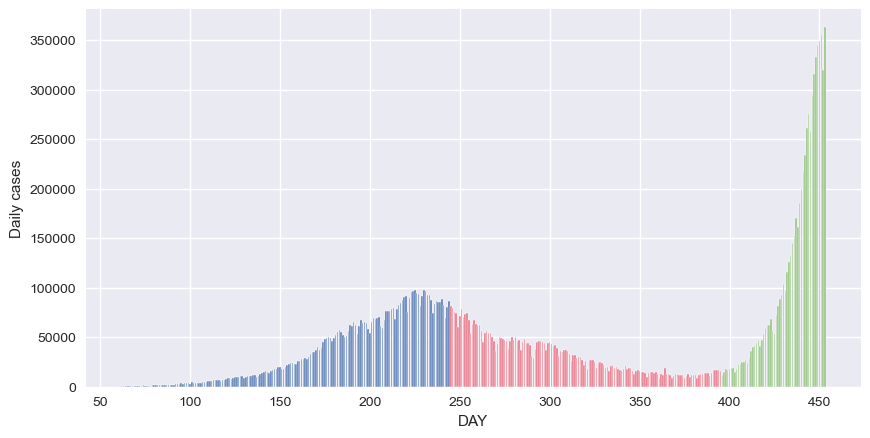

In [515]:
import seaborn as sns
mpl.style.use('seaborn')
#visualizing the time series of all the phases
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Daily cases') 
plt.bar(df1['index'], df1['Daily Confirmed'], label='Dawn')
plt.bar(df2['index'], df2['Daily Confirmed'], color = '#e66c80', label='Calm')
plt.bar(df3['index'], df3['Daily Confirmed'], color = '#8ebf7a', label='Storm')

Selecting the required Features

In [434]:
#To avoid outliers
pop = df[['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Deceased', 'Total Deceased']][62:]

# Case Fatality Rate (CFR)

Case Fatality Rate is the number of reported Deaths due to Covid19 per the number of Reported Positive Cases on a particular Day.
It can be Calculated by:
CFR = (Daily Deceased/Daily Confirmed)*100 

In [516]:
pop['CFR'] = (pop['Daily Deceased']/pop['Daily Confirmed'])*100 #Calculating Case Fatality Rate

Calculating Population Mean

In [437]:
df[453:]['Total Deceased']/df[453:]['Total Confirmed']*100

453    1.115005
dtype: float64

Removing the outliers to minimize the bias 

In [438]:
pop['CFR'][pop['CFR']>17.5] #removing Outliers

138    18.076854
Name: CFR, dtype: float64

In [440]:
pop['CFR'][pop['CFR']>17.5] = float(df[453:]['Total Deceased']/df[453:]['Total Confirmed']*100)

Calculating the Population Mean of CFR of the entire Dataset for further Statistical Analysis, as it is the mean of all the values in the population.

In [441]:
import statistics #Mean and Standard Deviation
print('Population Mean = '+str(statistics.mean(pop['CFR'])))
mu_pop = statistics.mean(pop['CFR'])
#print('Phase1 Standard Deviation = '+str(statistics.stdev(pop['CFR'])))

Population Mean = 1.570954922516947


# Dawn (April - September)

First Case of Covid19 in India is reported at Kerala on Jan 27th, 2020 and the rest is history. To mitigate the spread of the virus, Social Distancing has been imposed followed by closing of Universities, Schools, Movie Theatres. A nationwide Lockdown has been announced on 24th March, 2020 to 19th April, 2020 yet the cases of Covid19 continued to proliferate in April, and gradully plummeted in September after peaking in August.

In [442]:
df1 = pop[0:183] #extracting from 1st April, 2020 to 30th September, 2020
df1 =  df1.reset_index()
df1.head()

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,62,1 April 2020,424,2059,6,53,1.415094
1,63,2 April 2020,486,2545,16,69,3.292181
2,64,3 April 2020,560,3105,14,83,2.500000
3,65,4 April 2020,579,3684,13,96,2.245250
4,66,5 April 2020,609,4293,22,118,3.612479


Mean and Standard Deviation

In [443]:
import statistics #Mean and Standard Deviation
print('Phase1 Mean = '+str(statistics.mean(df1['CFR'])))
print('Phase1 Standard Deviation = '+str(statistics.stdev(df1['CFR'])))

Phase1 Mean = 2.219021042631082
Phase1 Standard Deviation = 0.9433839507568849


Scatter plot for CFR time series data

A downward trend in the CFR can be observed in the first phase(dawn) which means that the number of deaths per positive cases has been decreases that may be a result of improved therapeutics or Medical care in India.

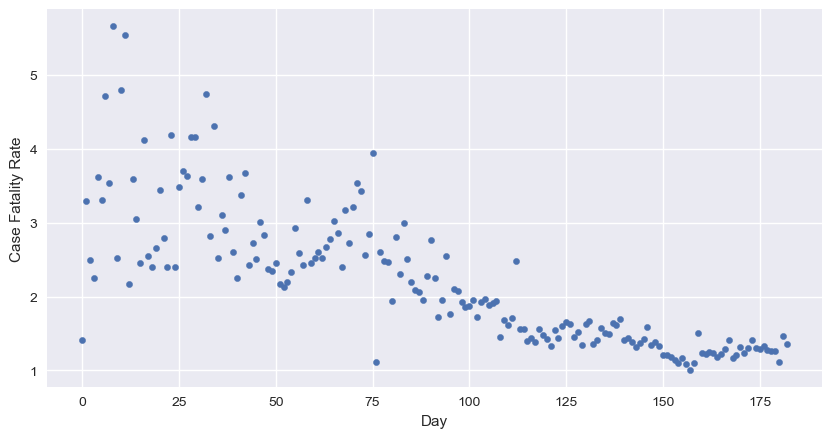

In [444]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns



mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.scatter(df1.index, df1['CFR'], s=20)
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()



Histogram

The distribution of the variable 'CFR' is skewed on the left side from the Histogram below

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

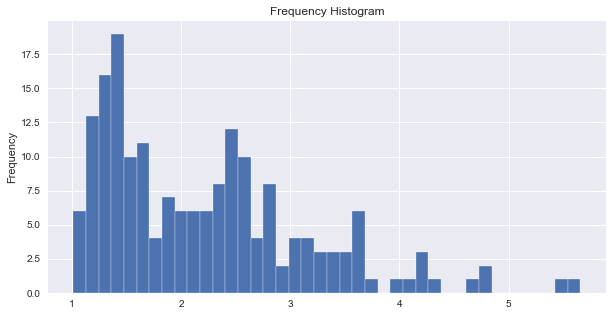

In [445]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 4), 'figure.dpi':100})

plt.hist(df1['CFR'], bins=40)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')




# Calm (October - Feb)

Just like the calmness of the eye of a Cyclone, there seem to be a steady decrease in the Daily cases between October, 2020 to February, 2021, As the Outbreak appeared to be in control, few states have decided to reopen Universities, Offices, Malls, etc.
Parallelly, contries like The United States, United Kingdom, etc are already hit by a much severe Second Wave. So, even though the lockdown is lifted in India, we need to be prepared for the worst.

In [446]:
df2 = pop[183:334] #Extracting from 1st October, 2020 to 30th January, 2021
df2 = df2.reset_index()
df2.head()

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,245,1 October 2020,81784,6392060,1099,99221,1.343784
1,246,2 October 2020,79883,6471943,1068,100289,1.336955
2,247,3 October 2020,75479,6547422,937,101226,1.241405
3,248,4 October 2020,74770,6622192,903,102129,1.207704
4,249,5 October 2020,60130,6682322,886,103015,1.473474


Mean and Standard Deviation

In [447]:
print('Phase2 mean = '+str(statistics.mean(df2['CFR'])))
print('Phase2 Standard Deviation = '+str(statistics.stdev(df2['CFR'])))

Phase2 mean = 1.1663602438452223
Phase2 Standard Deviation = 0.23878407743069166


The CFR seems to be hovering around 1.0% in the graph below, which means approximately 99% of the patients recover.  

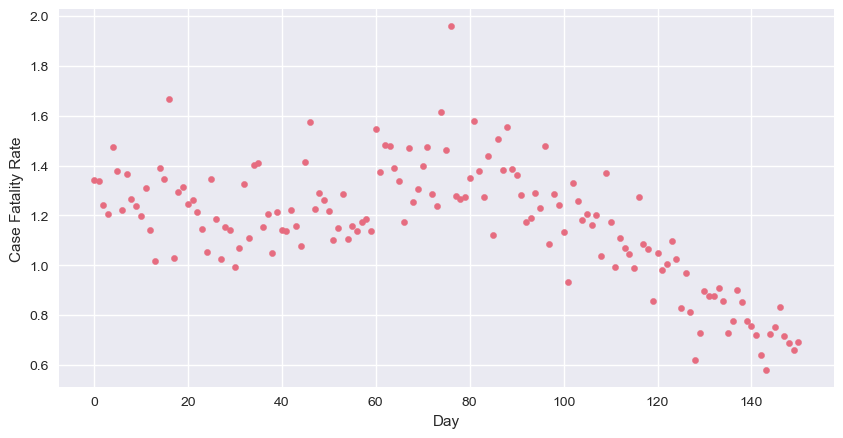

In [448]:
import matplotlib.pyplot as plt
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.scatter(df2.index, df2['CFR'], s=20, c='#e66c80')
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()



1.2% is the median CFR for 'Calm' phase.

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

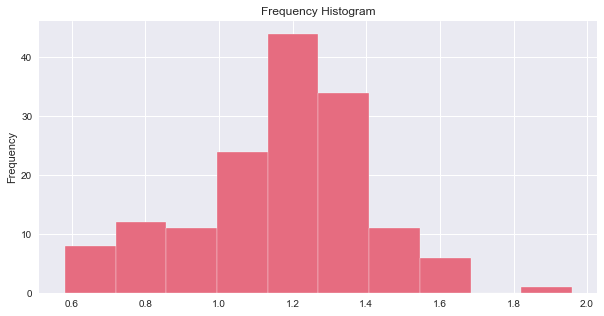

In [449]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df2['CFR'], bins=10, color = "#e66c80")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

# Storm (March - till Date)

Like Predicted, India was hit by the second storm, following the same pattern as the other countries just with a lag. There has been a steep increase in the day-wise reported cases and deaths since March, 2021 after loosening the restrictions during the 'Calm' phase. Hospitals are being flooded with covid19 patients and there's a shortage of oxygen tanks excacerbating the severity.

In [450]:
df3 = pop[334:] #Extracting from 1st February, 2021 till date
df3 = df3.reset_index()
df3.head()

,index,Date,Daily Confirmed,Total Confirmed,Daily Deceased,Total Deceased,CFR
0,396,1 March 2021,12270,11124248,92,156695,0.749796
1,397,2 March 2021,14998,11139246,98,156793,0.653420
2,398,3 March 2021,17425,11156671,87,156880,0.499283
3,399,4 March 2021,16824,11173495,113,156993,0.671660
4,400,5 March 2021,18324,11191819,109,157102,0.594848


Mean and Standard Deviation

In [451]:
print('Phase3 mean = '+str(statistics.mean(df3['CFR'])))
print('Phase3 Standard Deviation = '+str(statistics.stdev(df3['CFR'])))

Phase3 mean = 0.5795358966297696
Phase3 Standard Deviation = 0.11561930508778588


As observed below, The Case Fatality Rate for the last few days are below 1%, which can give us hope for surviving this phase. 

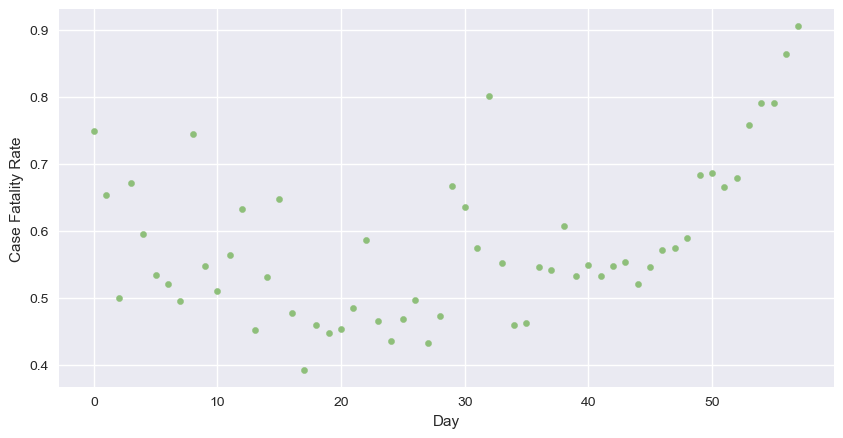

In [452]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(df3.index, df3['CFR'], s=20, c='#8ebf7a')
plt.xlabel("Day")
plt.ylabel("Case Fatality Rate")
plt.show()

Most of the 'CFR' values are between 0.5% to 0.6% from the histogram.

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

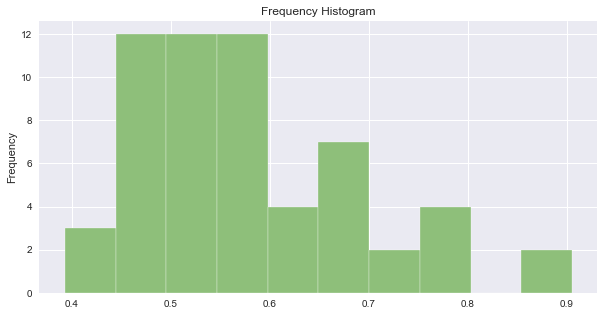

In [453]:
%matplotlib inline
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.rcParams.update({'figure.figsize':(10, 5), 'figure.dpi':100})

plt.hist(df3['CFR'], bins=10, color = "#8ebf7a")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [519]:
#converting series to dataframes
time1 = pop['CFR'].to_frame()
time2 = df1['CFR'].to_frame()
time3 = df2['CFR'].to_frame()
time4 = df3['CFR'].to_frame()

In [520]:
#naming labels
time1["Data"] = "Overall"
time2["Data"] = "Dawn"
time3["Data"] = "Calm"
time4["Data"] = "Storm"

In [517]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [521]:
#joining them
times = [time1, time2, time3, time4]
allTimes = pd.concat(times)

In [522]:
result = pd.concat(times)
#result

# Visualizing the boxplots of all the Phases

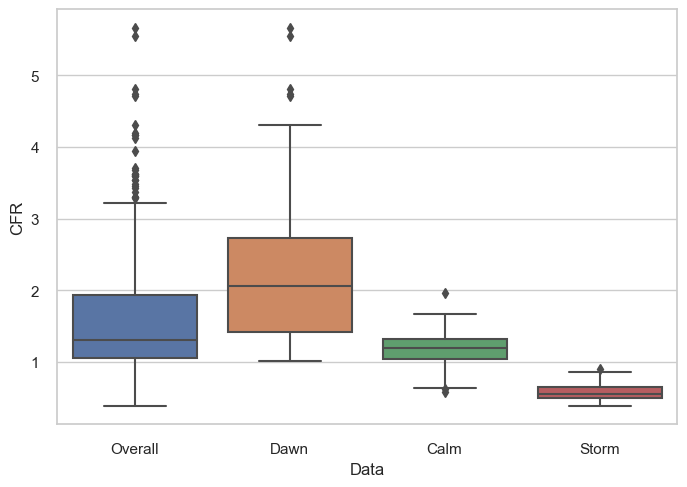

In [518]:
ax = sns.boxplot(x="Data", y="CFR", data=result)

By Looking at 'Dawn', 'Calm' and 'Storm' the ranges and the medians appear to be shifting downwards.

# z - test

This Statistical test determines if two populations means are different when the sample size is more than 30. In this example, we assume that all the variables follow a normal distribution.

A Null Hypothesis is assumed that there will be no significant difference between the population means.
The Alternative Hypothesis is that there will be a significant difference between the population means, and therefore it is unlikely that they are from the same sample at a certain Confidence level.

In this example we assume the alpha value as 0.05 i.e. 95% confidence level for all the cases, if the computed p-value is less than alpha it will reject the null hypothesis else it will accept.

p-value indicates how unlikely the statistic is. z-score indicates how far away from the mean it is.



# One sample Z-test

In a one sample z-test we test the mean of a sample(which is a different phase in our example) with a known population mean(Mean of the entire 'CFR' value in the India dataset.

Testing Phase 1 against the Population Mean

In [454]:
#z-test
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest
  
# Generate a random array of 50 numbers having mean 110 and sd 15
# similar to the IQ scores data we assume above
mean_iq = statistics.mean(df1['CFR'])
sd_iq = statistics.stdev(df1['CFR'])/math.sqrt(len(df1['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df1['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

mean=2.22 stdv=0.06
Reject Null Hypothesis


This shows Statistical Significance, which means that this is unlikely to occur at 95% confidence given the null hypothesis.

Testing Phase 2 against the Population Mean

In [455]:
mean_iq = statistics.mean(df2['CFR'])
sd_iq = statistics.stdev(df2['CFR'])/math.sqrt(len(df2['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df2['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Accept NUll Hypothesis")

mean=1.17 stdv=0.02
Accept NUll Hypothesis


This shows very low Statistical Significance, which means that this very likely to occur at 95% confidence interval.
Therefore 'Calm' Phase follows the similar pattern to the overall.

Testing Phase 3 against the Population Mean

In [456]:
mean_iq = statistics.mean(df3['CFR'])
sd_iq = statistics.stdev(df3['CFR'])/math.sqrt(len(df3['CFR']))
alpha =0.05
null_mean = mu_pop
data = sd_iq*randn(len(df3['CFR']))+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))
  
# now we perform the test. In this function, we passed data, in value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger
  
ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Accept NUll Hypothesis")

mean=0.58 stdv=0.02
Accept NUll Hypothesis


This shows very low Statistical Significance, which means that this very likely to occur at 95% confidence interval. Therefore 'Storm' Phase also follows the similar pattern to the overall.

# Two Sample z-test

I'm doing a 2-sample z-test to compare the means of each phase with one another, to prove if they are likely to occur or if there is any disruption that could have significantly changed the average of the 'CFR's in each phase.

Phase 2 against Phase 1

In [457]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df2['CFR'], x2=df1['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.038122951191908e-40
reject null hypothesis


This means that the means of 'CFR's of the 'Dawn' (Phase 1) and 'Calm' (Phase 2) are significantly different and highly unlikely to occur at 95% confidence. 

Phase 3 against Phase 1

In [458]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df3['CFR'], x2=df1['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.0645090064442255e-39
reject null hypothesis


This means that the means of 'CFR's of the 'Dawn' (Phase 1) and 'Storm' (Phase 3) are significantly different and highly unlikely to occur at 95% confidence.

Phase 3 against Phase 2

In [459]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest ,pval1 = stests.ztest(df3['CFR'], x2=df2['CFR'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.0271141441707685e-71
reject null hypothesis


This means that the means of 'CFR's of the 'Clam' (Phase 2) and 'Storm' (Phase 3) are significantly different and highly unlikely to occur at 95% confidence.

# Analysing Last 4 weeks

Especially, in the last 4 weeks, the virus has been spreading with an alarming rate, so I have taken only the last 28 days data to perform a T-test on this data with the overall Population Mean.

In [523]:
last_month = df3['CFR'][-28:] #Extracting last 4 week's data

In [524]:
last_month_data = df3[-28:]

In [525]:
last_month_data = last_month_data.reset_index()

In [527]:
last_month_data = last_month_data.rename(columns={"level_0": "X"})

In [529]:
last_month_data = last_month_data.reset_index()

In [531]:
last_month_data = last_month_data.rename(columns={"level_0": "X"})

Visualizing the CFR for last 4 weeks

<BarContainer object of 28 artists>

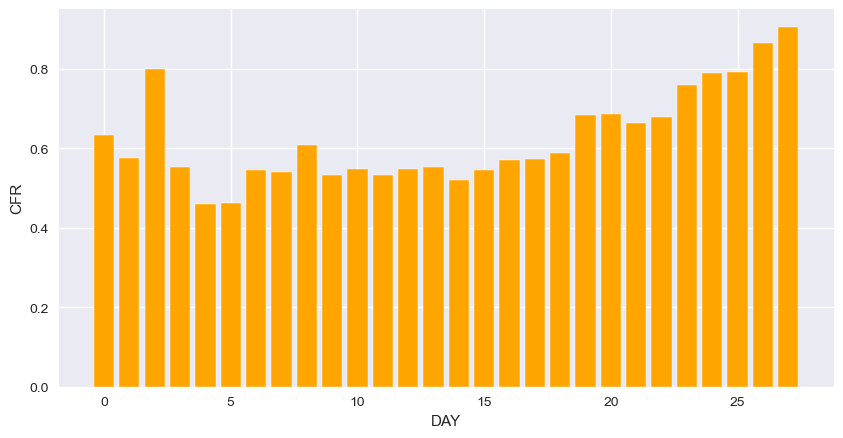

In [512]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('CFR') 
plt.bar(x, last_month_data['CFR'], color ='Orange')
#plt.plot(x, fitted_model(x), color ='orange')

CFR looks like it has been elevating for the last few days

In [489]:
last_month_data.to_csv('last_month.csv')

# T-test

The One Sample t Test is commonly used to test the following: Statistical difference between a mean and a known or hypothesized value of the mean in the population. If the mean change score is not significantly different from zero, no significant change occurred.

One Sample T-test (against Population Mean)

In [472]:
from scipy.stats import ttest_1samp
tscore, pvalue = ttest_1samp(last_month, popmean=mu_pop)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)

t Statistic:  -41.87106914581622
P Value:  4.240850292786867e-26


Reject Null Hypothesis

since P value is less than alpha value i.e. 0.05, the null hypothesis is rejected which means there is a Statistical Significance between the overall Mean 'CFR' and the mean of last month which could be caused by multiple factors.

# Results

1. Phase 1 vs Population - Reject Null Hypothesis 
2. Phase 2 vs Population - Accept Null Hypothesis
3. Phase 3 vs Population - Accept Null Hypothesis
4. Phase 1 vs Phase 2 - Reject Null Hypothesis
5. Phase 1 vs Phase 3 - Reject Null Hypothesis
6. Phase 2 vs Phase 3 - Reject Null Hypothesis
7. Last 28 days vs Population - Reject Null Hypothesis (t-test)

# SIR Model

An SIR model is an epidemiological model that computes the theoretical number of people infected with a contagious illness in a closed population over time. The name of this class of models derives from the fact that they involve coupled equations relating the number of susceptible people S(t), number of people infected I(t), and number of people who have recovered R(t). One of the simplest SIR models is the Kermack-McKendrick model.

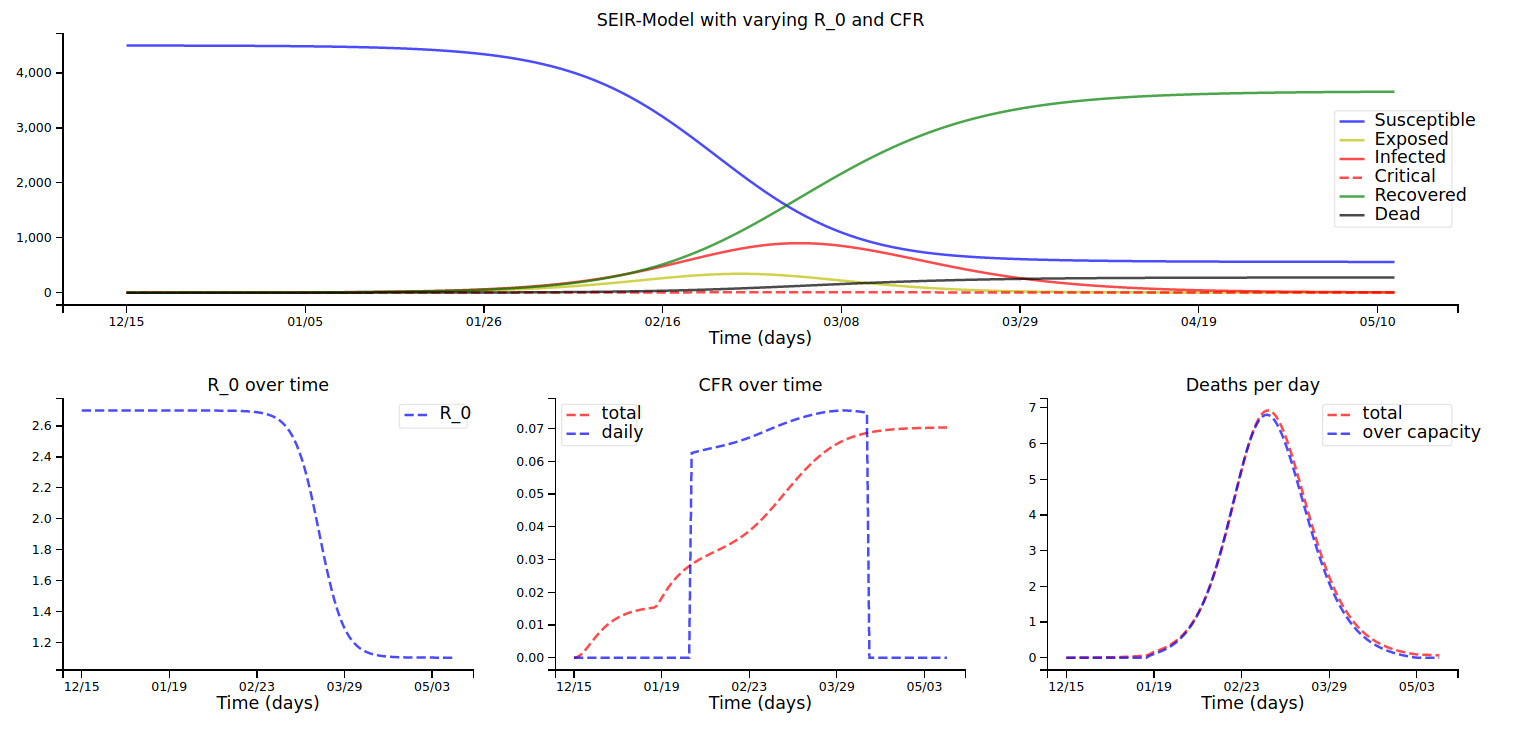

Since, we don't have the data of the number of Susceptible people, we will be predicting the Daily Cases and Deaths for the next week by fitting with the bell curve equation.

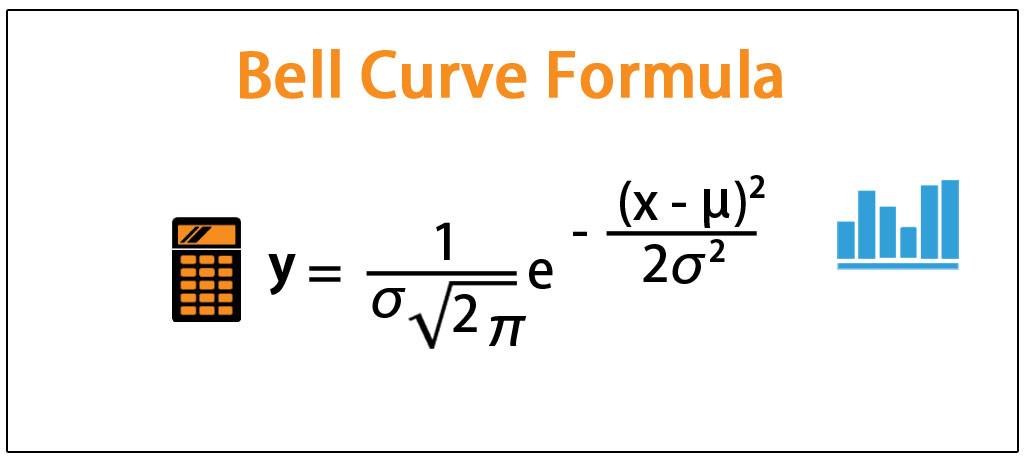

(This model is not to be confused with normal distribution even though they are similar)

In [473]:
from astropy import modeling

In [491]:
x=last_month_data['X']

# Predicting Cases

In [501]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, last_month_data['Daily Confirmed'])

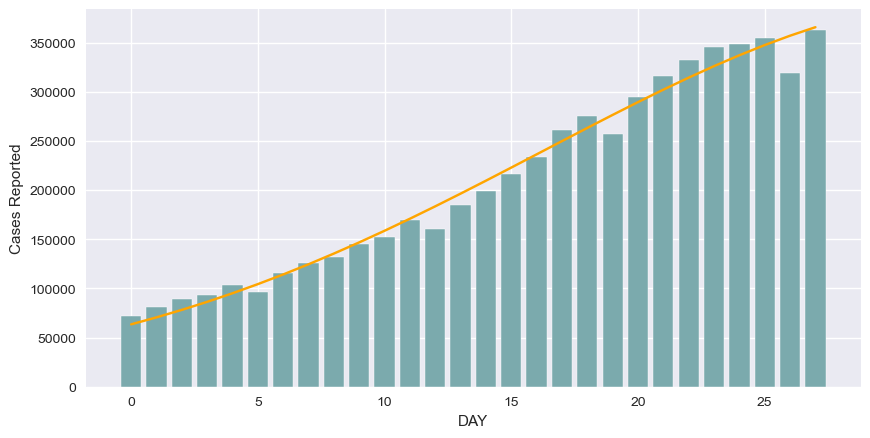

In [503]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Cases Reported') 
plt.bar(x, last_month_data['Daily Confirmed'], color ='#7baaad')
plt.plot(x, fitted_model(x), color ='orange')

In [496]:
l = [i for i in range(0, 35)]
l = pd.Series(l)

Next week forecasts for Daily Cases

In [497]:
#forecasts
fitted_model(l)[-7:]

array([373588.5811933 , 380235.18056988, 385783.33040618, 390181.86232773,
       393389.8538821 , 395377.26238271, 396125.39332522])

In [498]:
n=1
for i in fitted_model(l)[-7:]:
    print('Day '+str(n)+': '+str(i))
    n=n+1

Day 1: 373588.5811932988
Day 2: 380235.1805698815
Day 3: 385783.3304061798
Day 4: 390181.8623277296
Day 5: 393389.8538821041
Day 6: 395377.2623827146
Day 7: 396125.3933252167


# Predicting Deaths

In [505]:
fitter = modeling.fitting.LevMarLSQFitter()
model = modeling.models.Gaussian1D()   # depending on the data you need to give some initial values
fitted_model = fitter(model, x, last_month_data['Daily Deceased'])

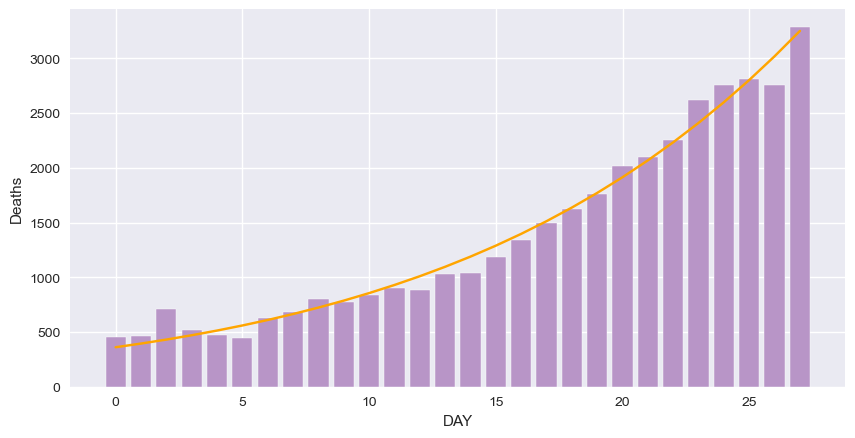

In [507]:
mpl.style.use('seaborn')
plt.figure(figsize=(10,5))
plt.xlabel('DAY') 
plt.ylabel('Deaths') 
plt.bar(x, last_month_data['Daily Deceased'], color ='#b895c7')
plt.plot(x, fitted_model(x), color ='orange')

Daily Deaths Forecast for next week

In [508]:
n=1
for i in fitted_model(l)[-7:]:
    print('Day '+str(n)+': '+str(i))
    n=n+1

Day 1: 3499.501584785581
Day 2: 3763.735786080453
Day 3: 4045.5933582192374
Day 4: 4346.057743538237
Day 5: 4666.15243388885
Day 6: 5006.941504045057
Day 7: 5369.53006362199
